<a href="https://colab.research.google.com/github/BenjaminDKLuong/Colab_Notes/blob/master/Predict_Airline_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict_Airline_Passengers

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PacktPublishing/Real-World-Python-Deep-Learning-Projects/master/Section%202%20Code/source/data/airline_data.csv'
df = pd.read_csv(url,header=2)


In [21]:
df.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1999127.0,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1858558.0,NaN


In [0]:
def get_raw_xy(data, column='Country Name', value='World'):
    v=data.loc[data[column] == value].iloc[:,17:62]
    x=[ v for v in v.values.astype('float32')[0] ]
    return x, [ int(vv) for vv in list(v) ]

In [0]:
values, years = get_raw_xy(df)
rv=list(zip(years, values))

In [0]:
def get_vpo(values):
    yy=[np.nan]*len(values)
    for i, v in enumerate(values):
        if i+1>len(values)-1:
            break
        yy[i+1]=values[i]
    return yy

In [0]:
import numpy as np
past_values=get_vpo(values)

In [0]:
dpo=list(zip([1972]+years, past_values, years, values))
dpo=list(zip(past_values[1:], values[1:]))
year_df, X, Y = years[1:], past_values[1:], values[1:]

In [0]:
def train_test_split(rawx, xpo):
    train_size=int(len(rawx)*0.80)
    test_size=int(len(rawx)*0.20)
    #print(train_size, test_size, len(rawx))
    train_x, train_y = np.array(rawx[:train_size]), np.array(xpo[:train_size])
    test_x, test_y = np.array(rawx[train_size:]), np.array(xpo[train_size:])
    return train_x, train_y, test_x, test_y

def get_params(script='train.py'):
    xa=''
    if script == 'train.py':
        xa='[plot|ploth]'
    try:
        name, epochs, batches=sys.argv[1:4]
    except ValueError:
        print('Usage: %s model_name epochs batch_size %s' % (script, xa))
        exit(1)
    try:
        plot=sys.argv[4]
    except IndexError:
        plot=False

    return name, int(epochs), int(batches), plot

In [0]:
mparams=confs[name]
model=mparams['model'](mparams['inputs'])

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Dense

import math
import os
import sys
import pandas
import pickle

Using TensorFlow backend.


In [0]:
train_x, train_y, test_x, test_y = train_test_split(X, Y)

In [0]:
inputs = 1
model = Sequential()
model.add(Dense(1,input_dim = inputs, activation='relu'))
model.add(Dense(1))

In [32]:
name = 'cnn'
epochs = 10
batches = 2
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mape'])
history=model.fit(train_x, train_y, verbose=2, epochs=epochs, batch_size=batches)


Epoch 1/10
 - 0s - loss: 1632981134781118720.0000 - mean_squared_error: 1632981134781118720.0000 - mean_absolute_percentage_error: 100.0000
Epoch 2/10
 - 0s - loss: 1632981153433548032.0000 - mean_squared_error: 1632981153433548032.0000 - mean_absolute_percentage_error: 100.0000
Epoch 3/10
 - 0s - loss: 1632981131835998208.0000 - mean_squared_error: 1632981131835998208.0000 - mean_absolute_percentage_error: 100.0000
Epoch 4/10
 - 0s - loss: 1632981133799411712.0000 - mean_squared_error: 1632981133799411712.0000 - mean_absolute_percentage_error: 100.0000
Epoch 5/10
 - 0s - loss: 1632981174049391104.0000 - mean_squared_error: 1632981174049391104.0000 - mean_absolute_percentage_error: 100.0000
Epoch 6/10
 - 0s - loss: 1632981139689652736.0000 - mean_squared_error: 1632981139689652736.0000 - mean_absolute_percentage_error: 100.0000
Epoch 7/10
 - 0s - loss: 1632981137726239232.0000 - mean_squared_error: 1632981137726239232.0000 - mean_absolute_percentage_error: 100.0000
Epoch 8/10
 - 0s - l

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Save models and the training history for later use
mname='/content/models/model-%s-%d-%d' % (name, epochs, batches)
model.save(mname+'.h5')
with open(mname+'-history.pickle', 'wb') as ms:
    pickle.dump(history.history, ms)
print()
print('Model and its history saved in %s*' % mname)

In [37]:
title='%s (epochs=%d, batch_size=%d)' % (name, epochs, batches)
# Test our model on both data that has been seen
# (training data set) and unseen (test data set)
print('Scores for %s' % title)

train_score = model.evaluate(train_x, train_y, verbose=0)
trscore='RMSE: %s MAPE: %.0f%%' % ("{:,.0f}".format(math.sqrt(train_score[0])), train_score[2])
print('Train Score: %s' % trscore)


test_score = model.evaluate(test_x, test_y, verbose=0)
tscore='RMSE: %s MAPE: %.0f%%' % ("{:,.0f}".format(math.sqrt(test_score[0])), train_score[2])
print('Test Score: %s' % tscore)

Scores for cnn (epochs=10, batch_size=2)
Train Score: RMSE: 1,277,881,470 MAPE: 100%
Test Score: RMSE: 3,151,623,686 MAPE: 100%


In [77]:
# Predict
pred_list = []
for each_y in Y:
  y= np.expand_dims(each_y, 1)
  pred = model.predict(y)
  pred_list.append(pred[0][0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
! pip install plotnine 
from plotnine import *

In [79]:
df = pd.DataFrame({'year':year_df,'Values1':pred_list,'Values2':Y})
df.head()

,year,Values1,Values2
0,1974,0.0,421145216.0
1,1975,0.0,432276512.0
2,1976,0.0,471773408.0
3,1977,0.0,513269280.0
4,1978,0.0,576089984.0


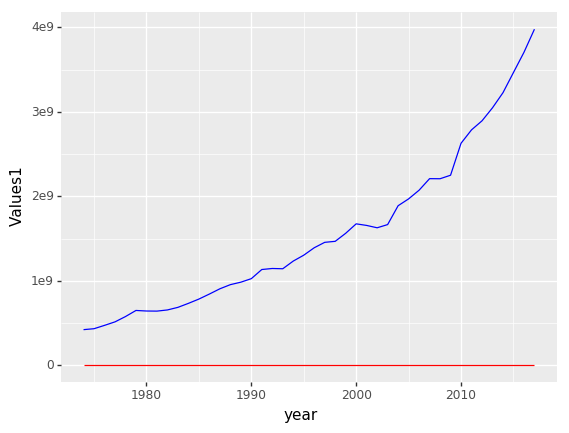

<ggplot: (-9223363275247125269)>

In [84]:
p = ggplot(df)+geom_line(aes(x="year", y = "Values1"), color = 'r')+geom_line(aes(x="year", y = "Values2"), color = 'b')

p